In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Assuming your dataset is in a CSV file named 'house_dataset.csv'
dataset = pd.read_csv('/content/house-prices.csv')

# Preprocess data
# Assuming 'Brick' and 'Neighborhood' are categorical variables
le = LabelEncoder()
dataset['Brick'] = le.fit_transform(dataset['Brick'])
dataset['Neighborhood'] = le.fit_transform(dataset['Neighborhood'])

# Split dataset into features and target
X = dataset.drop(['Brick', 'Neighborhood'], axis=1)
y = dataset['Price']
print(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
print("Linear Regression RMSE:", linear_rmse)

# Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
print("SVM RMSE:", svm_rmse)

# XGBoost
xgboost_model = GradientBoostingRegressor()
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)
xgboost_rmse = mean_squared_error(y_test, xgboost_predictions, squared=False)
print("XGBoost RMSE:", xgboost_rmse)


     Home   Price  SqFt  Bedrooms  Bathrooms  Offers
0       1  114300  1790         2          2       2
1       2  114200  2030         4          2       3
2       3  114800  1740         3          2       1
3       4   94700  1980         3          2       3
4       5  119800  2130         3          3       3
..    ...     ...   ...       ...        ...     ...
123   124  119700  1900         3          3       3
124   125  147900  2160         4          3       3
125   126  113500  2070         2          2       2
126   127  149900  2020         3          3       1
127   128  124600  2250         3          3       4

[128 rows x 6 columns]
Linear Regression RMSE: 4.0359751163139965e-12
SVM RMSE: 24484.37865786416
XGBoost RMSE: 1833.013112607979


**Python and scikit-learn library for house price prediction using Linear Regression, SVM (Support Vector Machine), and XGBoost for a dataset with features: Home, SqFt, Bedrooms, Bathrooms, Offers, Brick, Neighborhood.**



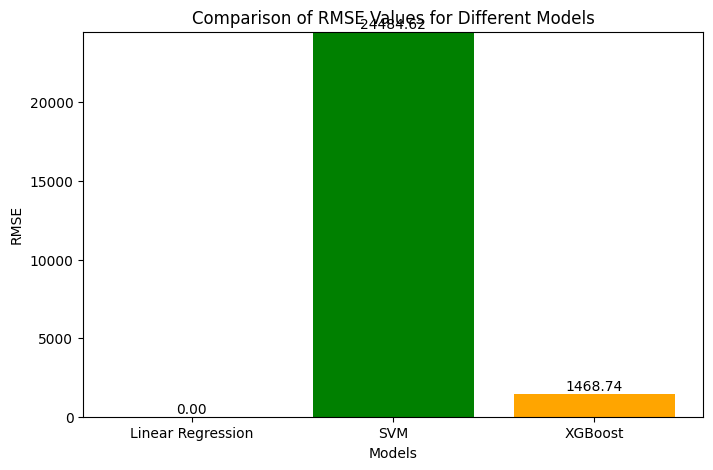

In [14]:
import matplotlib.pyplot as plt

# RMSE values
rmse_values = [linear_rmse, svm_rmse, xgboost_rmse]
models = ['Linear Regression', 'SVM', 'XGBoost']

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Values for Different Models')
plt.ylim(0, max(rmse_values) + 5)  # Adjust the y-axis limit for better visualization

# Display the RMSE values on top of the bars
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom')

plt.show()


***The RMSE is a measure of how well the model predicts the target variable (house prices in this case). Lower RMSE values indicate better predictive performance. It's important to note that the actual output will vary depending on the data in your dataset, the features, and the specific characteristics of your dataset.***





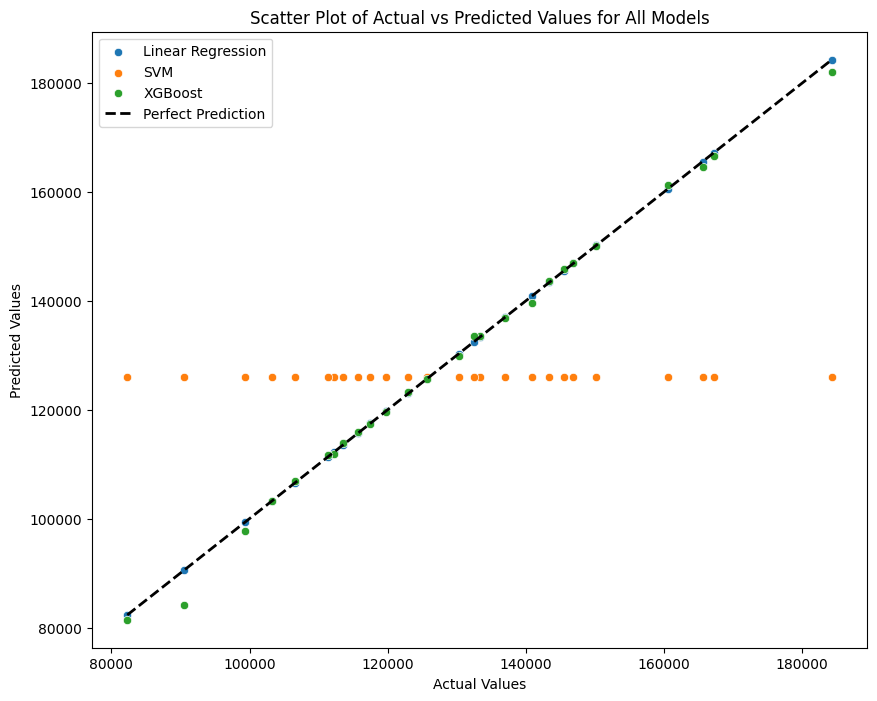

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': linear_predictions,
    'SVM': svm_predictions,
    'XGBoost': xgboost_predictions
})

# Scatter plot for all three models
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Actual', y='Linear Regression', data=results_df, label='Linear Regression')
sns.scatterplot(x='Actual', y='SVM', data=results_df, label='SVM')
sns.scatterplot(x='Actual', y='XGBoost', data=results_df, label='XGBoost')

# Plot diagonal line for reference
plt.plot([min(results_df['Actual']), max(results_df['Actual'])],
         [min(results_df['Actual']), max(results_df['Actual'])], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values for All Models')
plt.legend()
plt.show()


***To interpret the output:***

**Linear Regression RMSE:** Lower RMSE values are better. If the Linear Regression model has the lowest RMSE among the three, it suggests that a linear relationship between features and target variable is a good fit for your data.

**SVM RMSE:**Similar to Linear Regression, lower RMSE values are better. SVM aims to find the hyperplane that best separates the data into classes, and the RMSE measures the error in predicting the target variable.

**XGBoost RMSE:** XGBoost is an ensemble method that combines the predictions of multiple weak models (typically decision trees). If XGBoost has the lowest RMSE, it suggests that the ensemble of decision trees is capturing complex relationships in the data.

In [16]:
from sklearn.metrics import mean_absolute_error

linear_mae = mean_absolute_error(y_test, linear_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
xgboost_mae = mean_absolute_error(y_test, xgboost_predictions)

print("Linear Regression MAE:", linear_mae)
print("SVM MAE:", svm_mae)
print("XGBoost MAE:", xgboost_mae)


Linear Regression MAE: 1.9589116653570764e-11
SVM MAE: 19875.851428224672
XGBoost MAE: 765.4156784786666


**Mean Absolute Error (MAE):** MAE is the average absolute difference between the predicted and actual values. It provides a measure of the average magnitude of errors without considering their direction.

In [17]:
from sklearn.metrics import r2_score

linear_r2 = r2_score(y_test, linear_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)

print("Linear Regression R-squared:", linear_r2)
print("SVM R-squared:", svm_r2)
print("XGBoost R-squared:", xgboost_r2)


Linear Regression R-squared: 1.0
SVM R-squared: -0.017132323123116855
XGBoost R-squared: 0.9963400002904869


**R-squared (R2 Score):** R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

In [18]:
from sklearn.metrics import explained_variance_score

linear_ev = explained_variance_score(y_test, linear_predictions)
svm_ev = explained_variance_score(y_test, svm_predictions)
xgboost_ev = explained_variance_score(y_test, xgboost_predictions)

print("Linear Regression Explained Variance:", linear_ev)
print("SVM Explained Variance:", svm_ev)
print("XGBoost Explained Variance:", xgboost_ev)


Linear Regression Explained Variance: 1.0
SVM Explained Variance: 0.00048300265533407494
XGBoost Explained Variance: 0.9966664995439131


creates a 2x2 grid of bar charts, each representing a different metric (***RMSE, MAE, R-squared, Explained Variance***). The bars correspond to the different models.

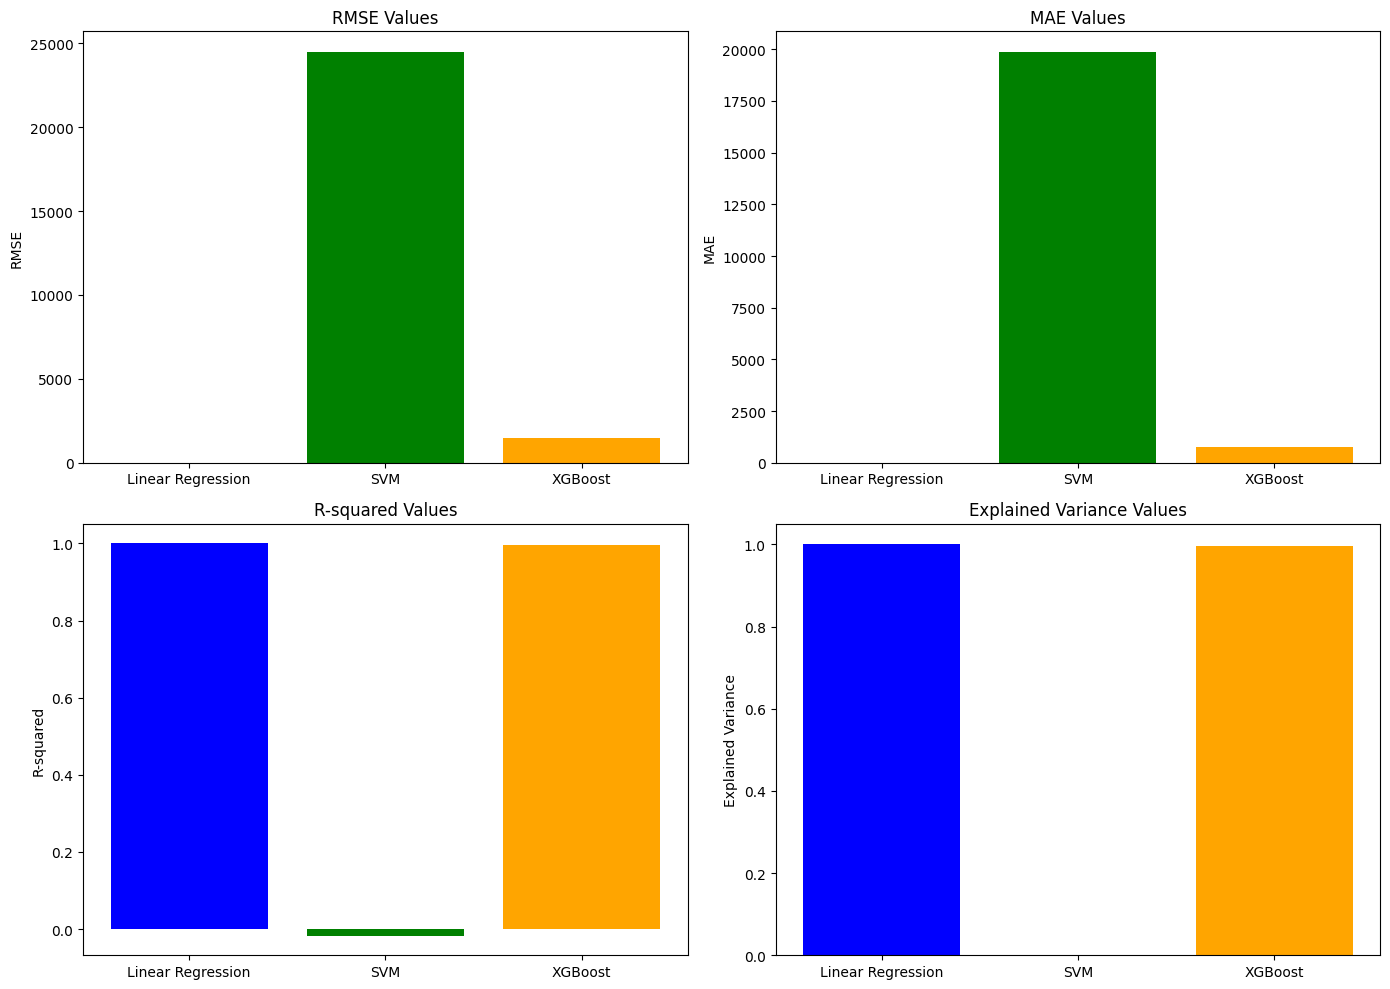

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics values
rmse_values = [linear_rmse, svm_rmse, xgboost_rmse]
mae_values = [linear_mae, svm_mae, xgboost_mae]
r2_values = [linear_r2, svm_r2, xgboost_r2]
ev_values = [linear_ev, svm_ev, xgboost_ev]

models = ['Linear Regression', 'SVM', 'XGBoost']

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# RMSE
axes[0, 0].bar(models, rmse_values, color=['blue', 'green', 'orange'])
axes[0, 0].set_title('RMSE Values')
axes[0, 0].set_ylabel('RMSE')

# MAE
axes[0, 1].bar(models, mae_values, color=['blue', 'green', 'orange'])
axes[0, 1].set_title('MAE Values')
axes[0, 1].set_ylabel('MAE')

# R-squared
axes[1, 0].bar(models, r2_values, color=['blue', 'green', 'orange'])
axes[1, 0].set_title('R-squared Values')
axes[1, 0].set_ylabel('R-squared')

# Explained Variance
axes[1, 1].bar(models, ev_values, color=['blue', 'green', 'orange'])
axes[1, 1].set_title('Explained Variance Values')
axes[1, 1].set_ylabel('Explained Variance')

plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

# Create SVR model
svm_model = SVR()

# Perform GridSearchCV for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, scoring='neg_mean_squared_error', cv=5)
svm_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_svm_params = svm_grid_search.best_params_

# Train SVM with best hyperparameters
best_svm_model = SVR(**best_svm_params)
best_svm_model.fit(X_train, y_train)
svm_predictions_tuned = best_svm_model.predict(X_test)

# Calculate RMSE for tuned SVM
svm_rmse_tuned = mean_squared_error(y_test, svm_predictions_tuned, squared=False)
print("Tuned SVM RMSE:", svm_rmse_tuned)


Tuned SVM RMSE: 0.03990984296611941


In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid for XGBoost
xgboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create XGBRegressor model
xgboost_model = XGBRegressor()

# Perform GridSearchCV for XGBoost
xgboost_grid_search = GridSearchCV(xgboost_model, xgboost_param_grid, scoring='neg_mean_squared_error', cv=5)
xgboost_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_xgboost_params = xgboost_grid_search.best_params_

# Train XGBoost with best hyperparameters
best_xgboost_model = XGBRegressor(**best_xgboost_params)
best_xgboost_model.fit(X_train, y_train)
xgboost_predictions_tuned = best_xgboost_model.predict(X_test)

# Calculate RMSE for tuned XGBoost
xgboost_rmse_tuned = mean_squared_error(y_test, xgboost_predictions_tuned, squared=False)
print("Tuned XGBoost RMSE:", xgboost_rmse_tuned)


Tuned XGBoost RMSE: 1158.621179155537


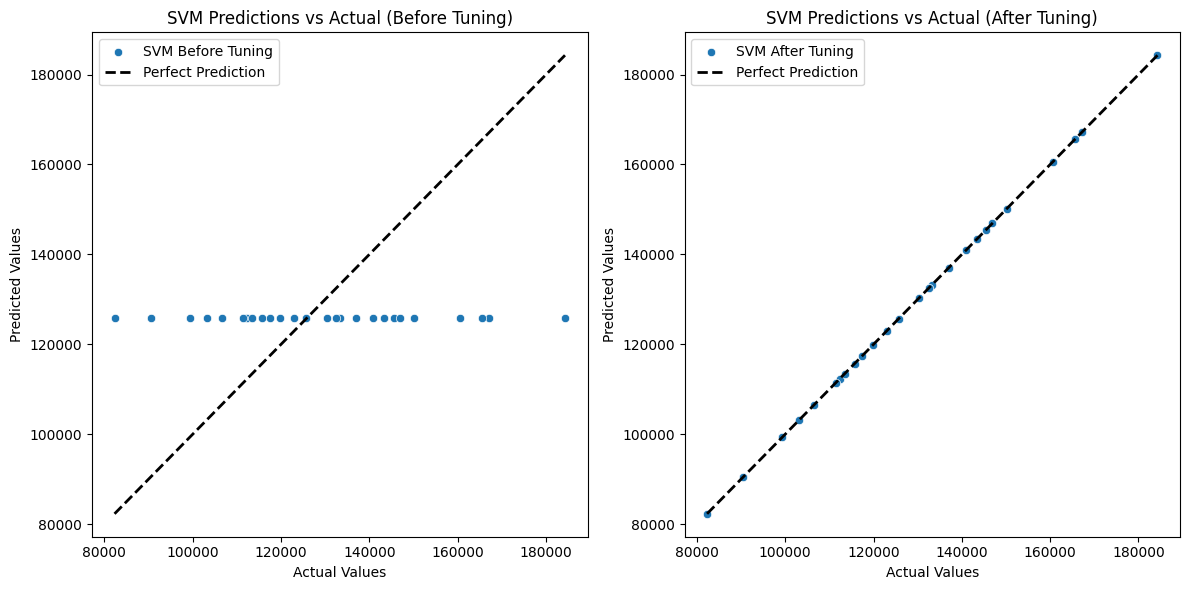

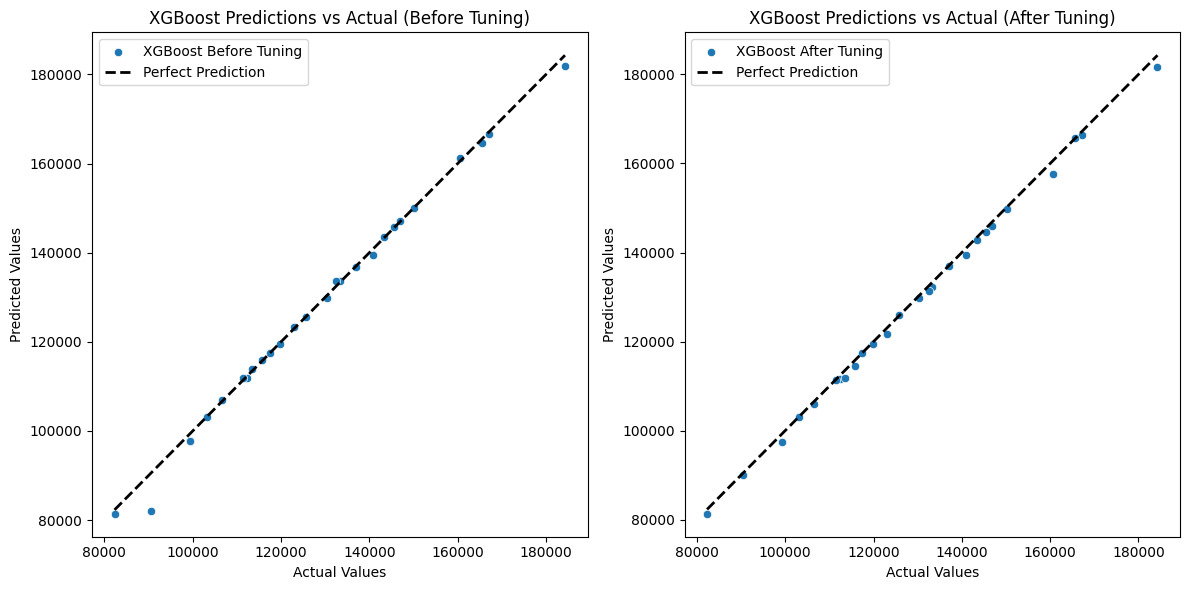

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for SVM predictions before tuning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=svm_predictions, label='SVM Before Tuning')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.title('SVM Predictions vs Actual (Before Tuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Scatter plot for SVM predictions after tuning
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=svm_predictions_tuned, label='SVM After Tuning')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.title('SVM Predictions vs Actual (After Tuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot for XGBoost predictions before tuning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=xgboost_predictions, label='XGBoost Before Tuning')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.title('XGBoost Predictions vs Actual (Before Tuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Scatter plot for XGBoost predictions after tuning
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=xgboost_predictions_tuned, label='XGBoost After Tuning')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.title('XGBoost Predictions vs Actual (After Tuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error

# Linear Regression
linear_predictions = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
print("Linear Regression RMSE:", linear_rmse)

# SVM (Before Tuning)
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_rmse_before_tuning = mean_squared_error(y_test, svm_predictions, squared=False)
print("SVM RMSE (Before Tuning):", svm_rmse_before_tuning)

# SVM (After Tuning)
svm_predictions_tuned = best_svm_model.predict(X_test)
svm_rmse_tuned = mean_squared_error(y_test, svm_predictions_tuned, squared=False)
print("SVM RMSE (After Tuning):", svm_rmse_tuned)

# XGBoost (Before Tuning)
xgboost_model = GradientBoostingRegressor()
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)
xgboost_rmse_before_tuning = mean_squared_error(y_test, xgboost_predictions, squared=False)
print("XGBoost RMSE (Before Tuning):", xgboost_rmse_before_tuning)

# XGBoost (After Tuning)
xgboost_predictions_tuned = best_xgboost_model.predict(X_test)
xgboost_rmse_tuned = mean_squared_error(y_test, xgboost_predictions_tuned, squared=False)
print("XGBoost RMSE (After Tuning):", xgboost_rmse_tuned)


Linear Regression RMSE: 4.0359751163139965e-12
SVM RMSE (Before Tuning): 24484.37865786416
SVM RMSE (After Tuning): 0.03990984296611941
XGBoost RMSE (Before Tuning): 1650.022010654248
XGBoost RMSE (After Tuning): 1158.621179155537


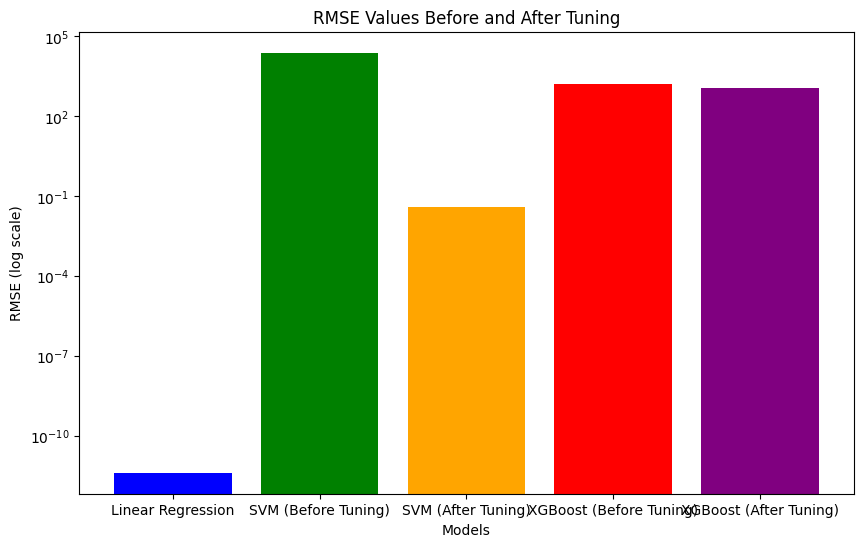

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# RMSE values
rmse_values = [linear_rmse, svm_rmse_before_tuning, svm_rmse_tuned, xgboost_rmse_before_tuning, xgboost_rmse_tuned]
models = ['Linear Regression', 'SVM (Before Tuning)', 'SVM (After Tuning)', 'XGBoost (Before Tuning)', 'XGBoost (After Tuning)']

# Filter out NaN or None values
rmse_values = [value for value in rmse_values if value is not None]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models[:len(rmse_values)], rmse_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.title('RMSE Values Before and After Tuning')
plt.xlabel('Models')
plt.ylabel('RMSE (log scale)')
plt.show()




***Conclusion***
It is found that **linear regrssion **performs well since there is a linear relationship in the data.

ALso **SVM** performs well after the hyperparameter tuning.

**XGBOOST algorithm **may performs well if there is non linera relationship in the dataset